Chargement du dataset Mall_Customers...
Aperçu des données Mall_Customers:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Dimensions du dataset: (200, 5)
Colonnes: ['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual In

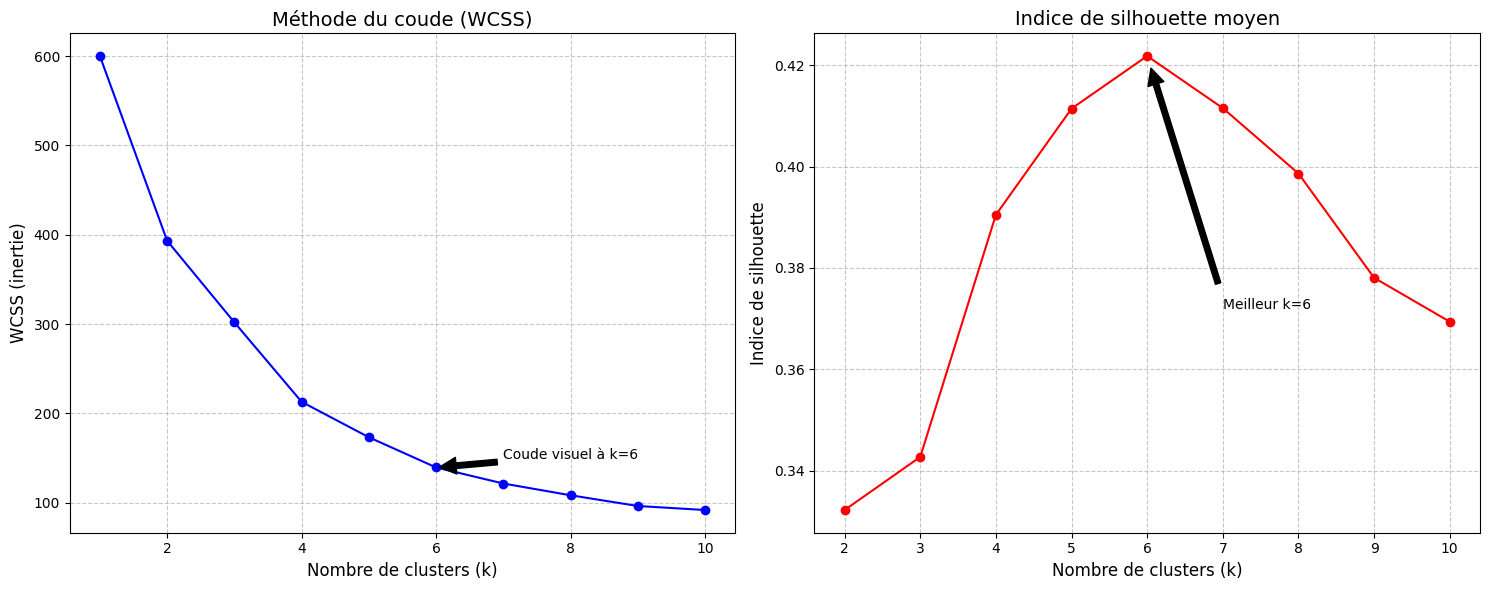


Résultats de l'analyse:
K | WCSS (inertie) | Silhouette
----------------------------------------
1 | 600.00 | 0.0000
2 | 393.25 | 0.3322
3 | 301.91 | 0.3427
4 | 213.01 | 0.3905
5 | 173.35 | 0.4114
6 | 139.57 | 0.4218
7 | 121.60 | 0.4115
8 | 108.44 | 0.3986
9 | 96.44 | 0.3781
10 | 91.93 | 0.3694

Méthode du coude: K optimal = 6
Méthode de la silhouette: K optimal = 6
Les deux méthodes suggèrent le même nombre optimal de clusters: K=6

Nombre optimal de clusters retenu: K=6

=== Comparaison entre K-means standard et K-means++ pour K = 6 ===

Comparaison des métriques entre K-means standard et K-means++:
     Métrique  K-means standard   K-means++  Différence
0     Inertie        139.570841  139.567300   -0.003541
1  Silhouette          0.421805    0.422582    0.000777


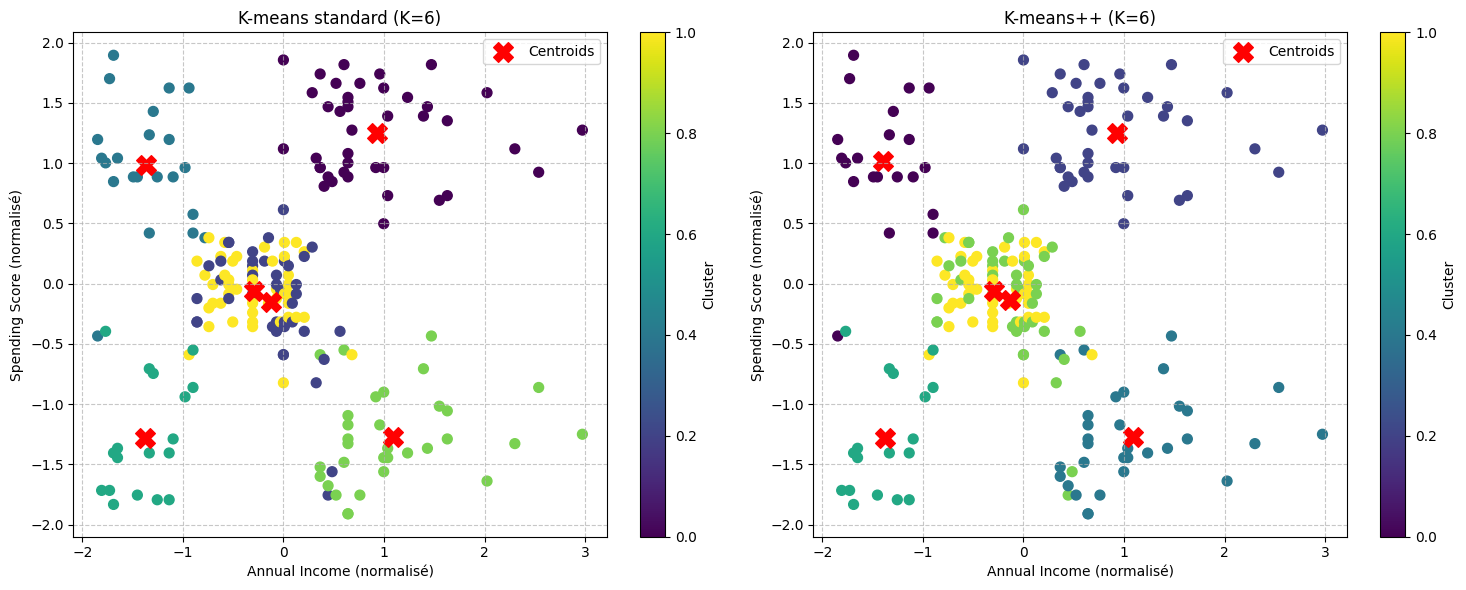

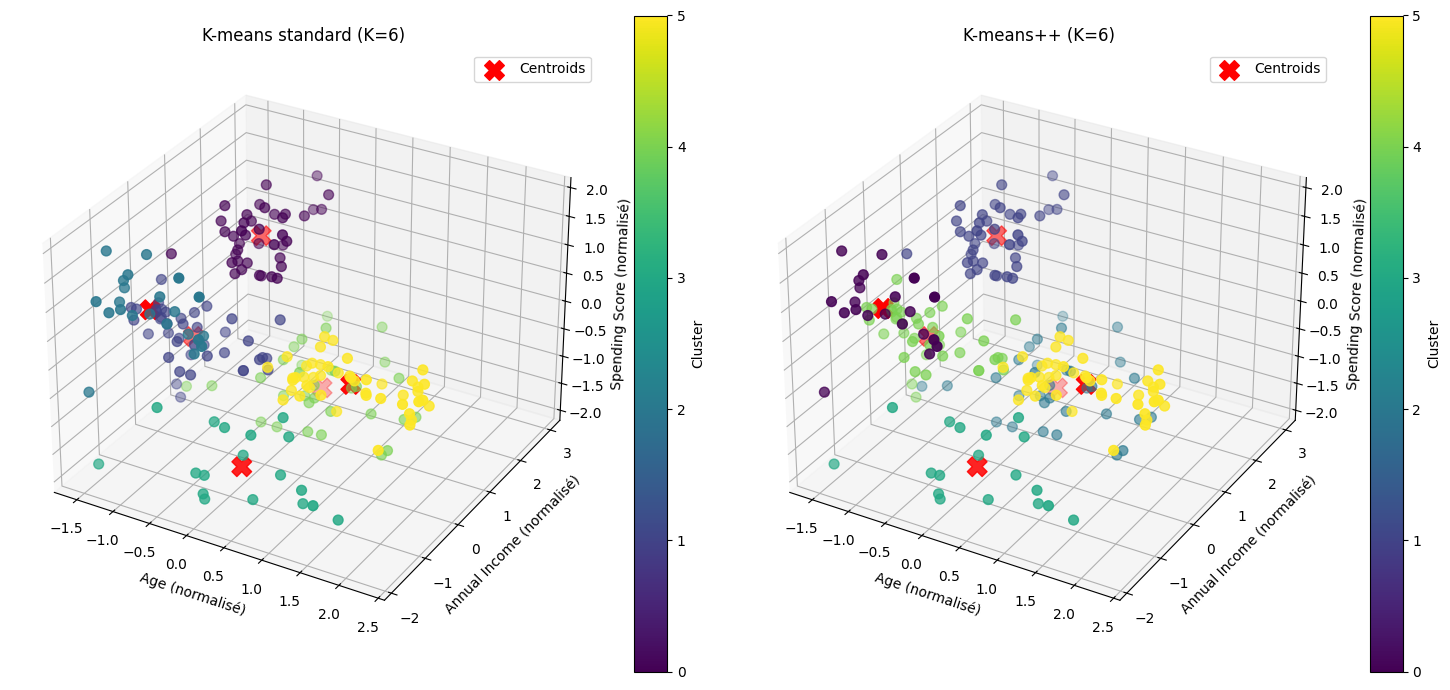


Analyse de la convergence:
Nombre d'itérations pour K-means standard: 10
Nombre d'itérations pour K-means++: 13
Différence: -3 itérations

Statistiques descriptives par cluster:

K-means standard:
Cluster 0 (taille: 41):
             Age  Annual Income (k$)  Spending Score (1-100)
count  41.000000           41.000000               41.000000
mean   32.487805           85.329394               82.439024
std     4.019465           16.793181                9.473776
min    22.000000           61.752577               63.000000
25%    30.000000           74.000000               75.000000
50%    32.000000           78.000000               83.000000
75%    35.000000           93.000000               90.000000
max    40.000000          137.000000               98.000000
------------------------------------------------------------
Cluster 1 (taille: 41):
             Age  Annual Income (k$)  Spending Score (1-100)
count  41.000000           41.000000               41.000000
mean   26.609756      

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from mpl_toolkits.mplot3d import Axes3D  # Pour la visualisation 3D

# 1. Charger le dataset Mall_Customers
print("Chargement du dataset Mall_Customers...")
try:
    # Si le fichier existe localement
    df = pd.read_csv("Mall_Customers.csv")
except:
    # Télécharger depuis GitHub
    print("Téléchargement depuis GitHub...")
    import urllib.request
    url = "https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv"
    urllib.request.urlretrieve(url, "Mall_Customers.csv")
    df = pd.read_csv("Mall_Customers.csv")

# Afficher les informations sur le dataset
print("Aperçu des données Mall_Customers:")
print(df.head())
print(f"Dimensions du dataset: {df.shape}")
print(f"Colonnes: {df.columns.tolist()}")
print(df.info())
print(df.describe())

# 2. Introduire artificiellement des valeurs manquantes comme demandé dans le PDF
print("\nIntroduction artificielle de valeurs manquantes...")
df.loc[5:10, "Age"] = np.nan
df.loc[15:20, "Annual Income (k$)"] = np.nan

print("Nombre de valeurs manquantes après modification:")
print(df.isnull().sum())

# 3. Imputer les valeurs manquantes avec la moyenne
print("\nImputation des valeurs manquantes avec la moyenne...")
imputer = SimpleImputer(strategy="mean")

# Sélectionner les colonnes numériques pour l'imputation
df[["Age", "Annual Income (k$)"]] = imputer.fit_transform(df[["Age", "Annual Income (k$)"]])

print("Nombre de valeurs manquantes après imputation:")
print(df.isnull().sum())

# 4. Sélectionner les variables numériques pour le clustering
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].values

# 5. Normaliser les données
print("\nNormalisation des données...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Détermination du nombre de clusters par la méthode du coude et de la silhouette
print("\n=== Détermination du nombre optimal de clusters ===")
wcss = []  # Within-Cluster Sum of Squares (WCSS) ou inertie
silhouette_scores = []  # Scores de silhouette pour chaque K
k_range = range(1, 11)  # Tester de 1 à 10 clusters

# Calculer l'inertie et le score de silhouette pour différentes valeurs de K
for k in k_range:
    # Utiliser scikit-learn KMeans standard pour calculer les métriques
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, init='random')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

    # Calculer le score de silhouette (pas disponible pour k=1)
    if k > 1:
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    else:
        silhouette_scores.append(0)  # Silhouette non définie pour k=1

# Tracer les deux métriques en fonction de K
plt.figure(figsize=(15, 6))

# Méthode du coude
plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, 'bo-')
plt.title('Méthode du coude (WCSS)', fontsize=14)
plt.xlabel('Nombre de clusters (k)', fontsize=12)
plt.ylabel('WCSS (inertie)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

coude_k = 6  # À partir de l'inspection visuelle du graphique

plt.annotate(f'Coude visuel à k={coude_k}',
             xy=(coude_k, wcss[coude_k-1]),
             xytext=(coude_k+1, wcss[coude_k-1]+10),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Indice de silhouette
plt.subplot(1, 2, 2)
plt.plot(k_range[1:], silhouette_scores[1:], 'ro-')  # Commencer à k=2
plt.title('Indice de silhouette moyen', fontsize=14)
plt.xlabel('Nombre de clusters (k)', fontsize=12)
plt.ylabel('Indice de silhouette', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Identifier le k avec le meilleur score de silhouette
best_silhouette_k = np.argmax(silhouette_scores[1:]) + 2  # +2 car on commence à k=2

plt.annotate(f'Meilleur k={best_silhouette_k}',
             xy=(best_silhouette_k, silhouette_scores[best_silhouette_k-1]),
             xytext=(best_silhouette_k+1, silhouette_scores[best_silhouette_k-1]-0.05),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.tight_layout()
plt.savefig('mall_customers_elbow_silhouette_method.png')
plt.show()

# Résultats numériques et analyse
print("\nRésultats de l'analyse:")
print("K | WCSS (inertie) | Silhouette")
print("-" * 40)
for k in k_range:
    print(f"{k} | {wcss[k-1]:.2f} | {silhouette_scores[k-1]:.4f}")

print(f"\nMéthode du coude: K optimal = {coude_k}")
print(f"Méthode de la silhouette: K optimal = {best_silhouette_k}")

# Analyse des résultats
if coude_k == best_silhouette_k:
    print(f"Les deux méthodes suggèrent le même nombre optimal de clusters: K={coude_k}")
    optimal_k = coude_k
else:
    print(f"Les deux méthodes suggèrent des nombres différents de clusters:")
    print(f"- Méthode du coude: K={coude_k}")
    print(f"- Méthode de la silhouette: K={best_silhouette_k}")

    # Pour Mall_Customers, on peut faire un choix basé sur la segmentation client
    if silhouette_scores[best_silhouette_k-1] > 0.5:  # Une silhouette > 0.5 est généralement un bon signe
        print(f"Comme le score de silhouette est bon ({silhouette_scores[best_silhouette_k-1]:.4f}), nous retenons K={best_silhouette_k} basé sur la méthode de la silhouette.")
        optimal_k = best_silhouette_k
    else:
        print(f"Comme la méthode du coude montre une inflexion claire à K={coude_k}, nous retenons cette valeur.")
        optimal_k = coude_k

print(f"\nNombre optimal de clusters retenu: K={optimal_k}")

# 7. Comparer K-means standard et K-means++ avec le nombre optimal de clusters
print("\n=== Comparaison entre K-means standard et K-means++ pour K =", optimal_k, "===")

# Initialiser les modèles
kmeans_standard = KMeans(n_clusters=optimal_k, random_state=42, n_init=10, init='random')
kmeans_plus_plus = KMeans(n_clusters=optimal_k, random_state=42, n_init=10, init='k-means++')

# Entraîner les modèles
kmeans_standard.fit(X_scaled)
kmeans_plus_plus.fit(X_scaled)

# Calculer les métriques d'évaluation
std_labels = kmeans_standard.labels_
pp_labels = kmeans_plus_plus.labels_

std_inertia = kmeans_standard.inertia_
pp_inertia = kmeans_plus_plus.inertia_

std_silhouette = silhouette_score(X_scaled, std_labels)
pp_silhouette = silhouette_score(X_scaled, pp_labels)

# Stocker les résultats dans un DataFrame pour une meilleure visualisation
results = pd.DataFrame({
    'Métrique': ['Inertie', 'Silhouette'],
    'K-means standard': [std_inertia, std_silhouette],
    'K-means++': [pp_inertia, pp_silhouette],
    'Différence': [pp_inertia - std_inertia, pp_silhouette - std_silhouette]
})

print("\nComparaison des métriques entre K-means standard et K-means++:")
print(results)

# 8. Visualiser les clusters pour les deux méthodes en 2D (Annual Income vs Spending Score)
plt.figure(figsize=(15, 6))

# K-means standard
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=std_labels, cmap='viridis', s=50)
plt.scatter(kmeans_standard.cluster_centers_[:, 1], kmeans_standard.cluster_centers_[:, 2],
            c='red', marker='X', s=200, label='Centroids')
plt.title(f'K-means standard (K={optimal_k})')
plt.xlabel("Annual Income (normalisé)")
plt.ylabel("Spending Score (normalisé)")
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# K-means++
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=pp_labels, cmap='viridis', s=50)
plt.scatter(kmeans_plus_plus.cluster_centers_[:, 1], kmeans_plus_plus.cluster_centers_[:, 2],
            c='red', marker='X', s=200, label='Centroids')
plt.title(f'K-means++ (K={optimal_k})')
plt.xlabel("Annual Income (normalisé)")
plt.ylabel("Spending Score (normalisé)")
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('mall_customers_kmeans_comparison_2d.png')
plt.show()

# 9. Visualiser les clusters pour les deux méthodes en 3D (Age, Annual Income, Spending Score)
fig = plt.figure(figsize=(15, 7))

# K-means standard
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2],
                      c=std_labels, cmap='viridis', s=50)
ax1.scatter(kmeans_standard.cluster_centers_[:, 0],
           kmeans_standard.cluster_centers_[:, 1],
           kmeans_standard.cluster_centers_[:, 2],
           c='red', marker='X', s=200, label='Centroids')
ax1.set_title(f'K-means standard (K={optimal_k})')
ax1.set_xlabel('Age (normalisé)')
ax1.set_ylabel('Annual Income (normalisé)')
ax1.set_zlabel('Spending Score (normalisé)')
ax1.legend()

# K-means++
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2],
                      c=pp_labels, cmap='viridis', s=50)
ax2.scatter(kmeans_plus_plus.cluster_centers_[:, 0],
           kmeans_plus_plus.cluster_centers_[:, 1],
           kmeans_plus_plus.cluster_centers_[:, 2],
           c='red', marker='X', s=200, label='Centroids')
ax2.set_title(f'K-means++ (K={optimal_k})')
ax2.set_xlabel('Age (normalisé)')
ax2.set_ylabel('Annual Income (normalisé)')
ax2.set_zlabel('Spending Score (normalisé)')
ax2.legend()

plt.colorbar(scatter1, ax=ax1, label='Cluster')
plt.colorbar(scatter2, ax=ax2, label='Cluster')

plt.tight_layout()
plt.savefig('mall_customers_kmeans_comparison_3d.png')
plt.show()

# 10. Analyser les différences de convergence (nombre d'itérations)
print("\nAnalyse de la convergence:")
print(f"Nombre d'itérations pour K-means standard: {kmeans_standard.n_iter_}")
print(f"Nombre d'itérations pour K-means++: {kmeans_plus_plus.n_iter_}")
print(f"Différence: {kmeans_standard.n_iter_ - kmeans_plus_plus.n_iter_} itérations")

# 11. Analyser les statistiques descriptives par cluster
print("\nStatistiques descriptives par cluster:")

# K-means standard
print("\nK-means standard:")
std_clusters_df = pd.DataFrame(data=X, columns=["Age", "Annual Income (k$)", "Spending Score (1-100)"])
std_clusters_df['Cluster'] = std_labels

for i in range(optimal_k):
    cluster_data = std_clusters_df[std_clusters_df['Cluster'] == i]
    print(f"Cluster {i} (taille: {len(cluster_data)}):")
    print(cluster_data.describe()[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    print("-" * 60)

# K-means++
print("\nK-means++:")
pp_clusters_df = pd.DataFrame(data=X, columns=["Age", "Annual Income (k$)", "Spending Score (1-100)"])
pp_clusters_df['Cluster'] = pp_labels

for i in range(optimal_k):
    cluster_data = pp_clusters_df[pp_clusters_df['Cluster'] == i]
    print(f"Cluster {i} (taille: {len(cluster_data)}):")
    print(cluster_data.describe()[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    print("-" * 60)

# 12. Analyser la stabilité avec différents random_states
random_states = [42, 0, 10, 20, 30]
std_metrics = []
pp_metrics = []

for rs in random_states:
    # K-means standard
    kmeans_std = KMeans(n_clusters=optimal_k, random_state=rs, n_init=1, init='random')
    kmeans_std.fit(X_scaled)

    # K-means++
    kmeans_pp = KMeans(n_clusters=optimal_k, random_state=rs, n_init=1, init='k-means++')
    kmeans_pp.fit(X_scaled)

    # Collecter les métriques
    std_metrics.append({
        'Random State': rs,
        'Inertie': kmeans_std.inertia_,
        'Silhouette': silhouette_score(X_scaled, kmeans_std.labels_),
        'Iterations': kmeans_std.n_iter_
    })

    pp_metrics.append({
        'Random State': rs,
        'Inertie': kmeans_pp.inertia_,
        'Silhouette': silhouette_score(X_scaled, kmeans_pp.labels_),
        'Iterations': kmeans_pp.n_iter_
    })

# Transformer les listes en DataFrames
std_df = pd.DataFrame(std_metrics)
pp_df = pd.DataFrame(pp_metrics)

# Statistiques sur les métriques pour évaluer la stabilité
print("\nAnalyse de la stabilité avec différents random_states:")
print("\nK-means standard - Statistiques:")
print(std_df.describe())

print("\nK-means++ - Statistiques:")
print(pp_df.describe())

# Comparer les écart-types pour évaluer la stabilité
std_stability = std_df[['Inertie', 'Silhouette', 'Iterations']].std()
pp_stability = pp_df[['Inertie', 'Silhouette', 'Iterations']].std()

stability_comparison = pd.DataFrame({
    'Métrique': std_stability.index,
    'Écart-type K-means': std_stability.values,
    'Écart-type K-means++': pp_stability.values,
    'Ratio de stabilité': pp_stability.values / std_stability.values
})

print("\nComparaison de la stabilité (écart-types):")
print(stability_comparison)
